# Using AirBNB data to analyze the market in Seattle
I did the analysis from the point of view of a Seattle homeowner. The main objective of a Seattle homeowner would be to maximize revenues by attracting customers willing to pay high prices. This results in the following qustions:

### 1. Business Questions

#### 1.1 What drives higher ratings ?

#### 1.2 Where are the highest prices for rentals ?

#### 1.3 When are the highest prices for rentals ?

### 2. Data Understanding

#### 2.1 Retrieve Data

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import collections
from itertools import chain
import sklearn
from time import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
%matplotlib inline

In [288]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

#### 2.2 Overview and Exploration

In [134]:
# Set some display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

In [135]:
# Check number of rows and columns
print(df_listings.shape)
print(df_calendar.shape)
print(df_reviews.shape)

(3818, 92)
(1393570, 4)
(84849, 6)


In [136]:
# Get column names
print(df_listings.columns.values)
print(df_calendar.columns.values)
print(df_reviews.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'thumbnail_url' 'medium_url' 'picture_url' 'xl_picture_url'
 'host_id' 'host_url' 'host_name' 'host_since' 'host_location'
 'host_about' 'host_response_time' 'host_response_rate'
 'host_acceptance_rate' 'host_is_superhost' 'host_thumbnail_url'
 'host_picture_url' 'host_neighbourhood' 'host_listings_count'
 'host_total_listings_count' 'host_verifications' 'host_has_profile_pic'
 'host_identity_verified' 'street' 'neighbourhood'
 'neighbourhood_cleansed' 'neighbourhood_group_cleansed' 'city' 'state'
 'zipcode' 'market' 'smart_location' 'country_code' 'country' 'latitude'
 'longitude' 'is_location_exact' 'property_type' 'room_type'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities'
 'square_feet' 'price' 'weekly_price' 'monthly_price' 'security_deposit'
 'cleaning_fee' 'guests_included' 'extra_people' 'minimum_nights'
 'm

In [137]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


There are 3 datasets:

- listings
- calendar
- reviews

The most relevant dataset for our analysis is the listings dataset. The calendar dataset is relvant for answering the third question about popular times.

Since the reviews dataset is mainly unstructured data, we will postpone any analysis.

#### 2.2 Treatment of missing data

In [138]:
# Check for missing values in listings
(df_listings.isnull().sum()/len(df_listings)).sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [139]:
# Check columns >=25% missing values
[cols for cols in df_listings.columns.values if (df_listings[cols].isnull().sum()/len(df_listings))>=0.25]

['neighborhood_overview',
 'notes',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'license']

In [140]:
# Distribution of missing values.
(df_listings.isnull().sum()/len(df_listings)).describe()

count    92.000000
mean      0.084893
std       0.181492
min       0.000000
25%       0.000000
50%       0.000000
75%       0.136983
max       1.000000
dtype: float64

There are a number of columns containing missing values. The license column has no values at all.

There are no missing values in the price column, perhaps this column can be used instead of weekly and monthly prices. But there seems to be no good substitute for square_feet.

In [141]:
df_listings[['monthly_price', 'weekly_price', 'price']].head(10)

,monthly_price,weekly_price,price
0,NaN,NaN,$85.00
1,"$3,000.00","$1,000.00",$150.00
2,NaN,NaN,$975.00
3,"$2,300.00",$650.00,$100.00
4,NaN,NaN,$450.00
5,NaN,$800.00,$120.00
6,NaN,$575.00,$80.00
7,NaN,$360.00,$60.00
8,"$1,700.00",$500.00,$90.00
9,"$3,000.00","$1,000.00",$150.00


In [142]:
df_listings[['monthly_price', 'weekly_price', 'price']].replace('[\$,]','',regex=True).astype(float).corr()

,monthly_price,weekly_price,price
monthly_price,1.000000,0.942644,0.873450
weekly_price,0.942644,1.000000,0.937861
price,0.873450,0.937861,1.000000


The price field seems to indicate a daily price, therefore I will drop the monthly and weekly prices from the dataset due to a large number of missing values. The price field should act as a good substitute.

In [143]:
df_listings[df_listings['square_feet'].notnull()][['square_feet', 'bathrooms', 'bedrooms', 'beds']].corr()

,square_feet,bathrooms,bedrooms,beds
square_feet,1.000000,0.381094,0.448786,0.312155
bathrooms,0.381094,1.000000,0.418992,0.303472
bedrooms,0.448786,0.418992,1.000000,0.742920
beds,0.312155,0.303472,0.742920,1.000000


The bathrooms and bedroom field will be used as substitutes for the mostly missing square_feet field.

In [144]:
df_listings[['security_deposit']].head(10)

,security_deposit
0,NaN
1,$100.00
2,"$1,000.00"
3,NaN
4,$700.00
5,NaN
6,$150.00
7,$150.00
8,NaN
9,$100.00


A missing security deposit can probably replaced by a value of 0.

In [145]:
df_listings[['neighborhood_overview']].head(10)

,neighborhood_overview
0,NaN
1,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound."
2,"Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes. The ""main drag"" is Queen Anne Ave. with a great selection of boutiques, restaurants, coffee shops and bars. Upper Queen Anne is just 1.5 miles from downtown Seattle, and situated on a hilltop with stunning panoramic views in every direction -- downtown Seattle, the Space Needle and Mt. Rainier to the southeast, Elliott Bay to the southwest, the Olympic Mountains to the west and the Cascade Mountains to the east. If you're a walker, you'll love the 4-mile ""Crown of Queen Anne"" loop which takes in all of these views!"
3,NaN
4,"We are in the beautiful neighborhood of Queen Anne on 14th Ave. W. A 5 minute walk from Whole Foods Market. Take a 5 minute drive south or north and find yourself in the lively neighborhood of Belltown or charming neighborhood of Ballard (respectively). Upper Queen Anne shops and restaurants are a 20 minute walk or a quick 5 minute drive up the hill. The Seattle Center (The Space Needle, the Children's Museum, EMP, Pacific Science Center, Chihuly Garden and Glass) is a 7 minute drive."
5,This part of Queen Anne has wonderful views and quiet streets with parking. There are several beautiful places to walk nearby.
6,"Close restaurants, coffee shops and grocery stores all in easy walking distance from our house."
7,We are centrally located between Downtown and ballard with a Whole Foods right across the street.
8,"Walking Score: 92 4 blocks from Kerry Park Famous Seattle restaurants within 1 block The hill became a popular spot for the city's early economic and cultural elite to build their mansions, and the name derives from the architectural style typical of many of the early homes. According to Wikipedia, Queen Anne's demographic is power-singles, young unmarried professionals. It boasts a bustling main street with restaurants, bars, shopping, coffee shops, farmers market, Trader Joe's, and the famous Molly Moon's Ice Cream."
9,"Queen Anne is a wonderful, truly functional village. You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound."


In [146]:
df_listings[['notes']].head(10)

,notes
0,NaN
1,"What's up with the free pillows? Our home was renovated and restored with health & safety in mind, especially the elimination/reduction of indoor allergens, toxins & other pollutants. (For this reason, we have no carpets, just hardwood & slate floors, with radiant heat.) Pillows tend to house a LOT of allergens over time, even when just used by a single owner. The statistics make many people feel pretty queasy but, essentially, pillows become great breeding grounds for bacteria and dust mites, not to mention drool, hair oils and perspiration. Since most people sweat more than a pint a night, the pillow can also easily trap mildew and mold. We use dust mite protectors for mattresses and duvets, but haven't found any that work well for pillows that maintain comfort/elasticity without the use of outgassing materials. So, I let the guests take their pillows but ask that they leave the pillowcases. And if you leave the pillows behind, they'll be donated to a local women's shelter that"
2,"Our house is located just 5 short blocks to Top Pot Doughnuts, Tribunali pizza, Caffe Fiore, Trader Joes and Molly Moons. Just 8 blocks to Queen Anne Ave."
3,NaN
4,Belltown
5,Let me know if you need anything or have suggestions to improve guest stays.
6,The room now has a mini frig to keep your favorite beverage chilled to perfection!
7,There are three rentals in our back yard . If you are not ok with sharing .. this is not the rental for you. NOW WITH High speed WI-FI !
8,NaN
9,"What's up with the free pillows? Our home was renovated and restored with health & safety in mind, especially the elimination/reduction of indoor allergens, toxins & other pollutants. (For this reason, we have no carpets, just hardwood & slate floors, with radiant heat.) Pillows tend to house a LOT of allergens over time, even when just used by a single owner. The statistics make many people feel pretty queasy but, essentially, pillows become great breeding grounds for bacteria and dust mites, not to mention drool, hair oils and perspiration. Since most people sweat more than a pint a night, the pillow can also easily trap mildew and mold. We use dust mite protectors for mattresses and duvets, but haven't found any that work well for pillows that maintain comfort/elasticity without the use of outgassing materials. So, I let the guests take their pillows but ask that they leave the pillowcases. And if you leave the pillows behind, they'll be donated to a local women's shelter that"


Since the neighborhood_overviewa and notes columns are unstructured text, that would requiere a sentiment analysis, these columns will be dropped.

In [147]:
df_listings[['cleaning_fee']].head(10)

,cleaning_fee
0,NaN
1,$40.00
2,$300.00
3,NaN
4,$125.00
5,$40.00
6,NaN
7,$25.00
8,NaN
9,$40.00


A missing cleaning fee can probably replaced by a value of 0.

In [148]:
(df_calendar.isnull().sum()/len(df_calendar)).sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

Again the price column is missing in a lot of rows (32%).

In [149]:
(df_reviews.isnull().sum()/len(df_reviews)).sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

There are no missing data for reviews except for a small number of missing comments.

In [150]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


For reasons described above the following columns will be dropped:
    
- neighborhood_overview
- notes
- square_feet
- weekly_price
- monthly_price,
- license

In [151]:
# Drop columns
df_listings.drop(columns=['neighborhood_overview', 'notes', 'square_feet', 'weekly_price', 'monthly_price', 'license'],inplace=True)

For reasons described above the missing values for cleaning_fee and security_deposit will be replaced with numeric 0.

In [152]:
# Fill missing values with 0
df_listings['security_deposit']=df_listings['security_deposit'].fillna(0)
df_listings['cleaning_fee']=df_listings['cleaning_fee'].fillna(0)

In [153]:
# Since the id column has no meaningful content, this column will be dropped, too.
df_listings.drop(columns=['id'],inplace=True)

### What drives higher prices ?

Since there are several columns in the review_scores, we have to analyze these columns.

In [154]:
# Check column names that begin with 'review_scores' 
[col for col in df_listings if col.startswith('review_scores_')]

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [155]:
# Check that all columns are numeric.
[type(df_listings[col][0]) for col in df_listings if col.startswith('review_scores_')]

[numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64]

All columns are numeric. The review_scores_rating column measures the overall experience, therefore we can attempt to predict the numeric value. We have to check that the target column review_scores_rating contains values in both the training and the test dataset.

In [156]:
# Count missing values in review_scores_rating column
df_listings['review_scores_rating'].isnull().sum()

647

In [157]:
647 / 3818

0.16946045049764275

As there are 17 %  rows of missing values in the column, we can drop the missing values.

In [158]:
# Drop rows with missing values
df_listings = df_listings.dropna(axis=0, subset=['review_scores_rating'])

In [159]:
# Split the data into features and target label
Y = df_listings['review_scores_rating']
x = df_listings.drop('review_scores_rating', axis = 1)

#### Remove irrelevant columns

There are several columns that seem to be irrelevant for the analysis. (Unique values, URL's that link to pictures)

In [160]:
# Columns with unique values
unique_cols=[col for col in x.columns.values if x[col].nunique()==1]
unique_cols

['scrape_id',
 'last_scraped',
 'experiences_offered',
 'state',
 'market',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'jurisdiction_names']

In [161]:
x.drop(columns=unique_cols,inplace=True)

In [162]:
#URL columns
url_cols=[col for col in x.columns.values if 'url' in col]
url_cols

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [163]:
x.drop(columns=url_cols,inplace=True)

We can see that there are a number of columns with unstructured data in the form of sentences, for example name, summary, description, neighbourhood_overview.

The host columns like host_id, host_name, host_since, host_location, host_about, host_verifications seem to contain irrelevant information. 

In [164]:
host_cols=['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications']
x.drop(columns=host_cols,inplace=True)

City, State, Street, smart_location, latitude and longitude are redundant data since all listings are in Seattle, WA. Zip code and neighbarhood are probably better variables.

In [165]:
location_cols=['city','street','smart_location', 'latitude','longitude']
x.drop(columns=location_cols,inplace=True)

There seems to be some redundancy within the neighbourhood data.

In [166]:
# Check neighbourhood columns
print(x['host_neighbourhood'].unique())
print(x['neighbourhood_cleansed'].unique())
print(x['neighbourhood_group_cleansed'].unique())
print(x['neighbourhood'].unique())

['Queen Anne' nan 'Ballard' 'Belltown' 'Phinney Ridge' 'Fremont' 'Holly'
 'Lower Queen Anne' 'Green Lake' 'Eastlake' 'Ravenna' 'Westlake'
 'Columbia City' 'Kaanapali' 'South Park' 'Wallingford' 'Capitol Hill'
 'Long Beach' 'Northwest District' 'Waianae Coast' 'Minor' 'Magnolia'
 'Madrona' 'Harrison/Denny-Blaine' 'Leschi' 'University District'
 'Roosevelt' 'Mission District' 'Madison Park' 'Stevens'
 'Central San Pedro' 'Atlantic' 'North Beacon Hill' 'Pike Place Market'
 'Central Business District' 'Portage Bay' 'South Lake Union'
 'Fenway/Kenmore' 'East Village' 'Clairemont Mesa East' 'Forestland'
 'Hollywood' 'Manhattan Beach' 'International District' 'Yesler Terrace'
 'First Hill' 'Anaheim' 'Maple Leaf' 'Seward Park' 'Pioneer Square'
 'Gatewood' 'The Junction' 'North Admiral' 'Arbor Heights' 'Alki'
 'Genesee' 'Crown Hill' 'Interbay' 'Industrial District' 'Holly Park'
 'Georgetown' 'South Beacon Hill' 'Greenwood' 'Bitter Lake' 'Fauntleroy'
 'South Delridge' 'Brighton' 'Highland Park' 

I decided to use neighbourhood_group_cleansed in order to avoid a large number of dummy variables.

In [167]:
nb_cols=['neighbourhood','host_neighbourhood','neighbourhood_cleansed']
x.drop(columns=nb_cols,inplace=True)

The variables first_review, last_review and calendar_updated are dates. They seem not to be relevant for question 1.

In [168]:
date_cols=['first_review','last_review','calendar_updated']
x.drop(columns=date_cols,inplace=True)

#### Removal of unstructured text columns

In [169]:
# Drop columns containing unstructured text data
text_cols=['name','summary', 'space', 'description','transit']
x.drop(columns=text_cols,inplace=True)

#### Feature enginnering of amenities columns

Since the amenities column is a list of amenities, we have to extract each amenity and transform it into a categorical variable.

In [170]:
# Split up amenities
df_amenities=x['amenities'].str.split(',',expand=True)
df_amenities.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,Heating,"""Family/Kid Friendly""",Washer,Dryer},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,{TV,Internet,"""Wireless Internet""",Kitchen,"""Free Parking on Premises""","""Buzzer/Wireless Intercom""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""","""Safety Card""","""Fire Extinguisher""",Essentials},None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,{TV,"""Cable TV""",Internet,"""Wireless Internet""","""Air Conditioning""",Kitchen,"""Free Parking on Premises""","""Pets Allowed""","""Pets live on this property""",Dog(s),Cat(s),"""Hot Tub""","""Indoor Fireplace""",Heating,"""Family/Kid Friendly""",Washer,Dryer,"""Smoke Detector""","""Carbon Monoxide Detector""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None
4,{TV,"""Cable TV""",Internet,"""Wireless Internet""",Kitchen,Heating,"""Family/Kid Friendly""","""Smoke Detector""","""Carbon Monoxide Detector""","""First Aid Kit""","""Fire Extinguisher""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,"{""Wireless Internet""","""Free Parking on Premises""",Heating,"""Smoke Detector""",Essentials,Shampoo},None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


We need to remove redundant punctuation and transforming to unique values to create the categorical features.

In [171]:
# Remove punctuation from amenities dataframe
df_amenities = df_amenities.replace('[^\w\s]','', regex=True)

# Add all amenities in dataframe to list
amenities_unique=[df_amenities[x].unique().tolist() for x in df_amenities.columns.values]

# Get unique values of amenities
amenities_unique=set(list(chain.from_iterable(amenities_unique)))
print(amenities_unique)

#remove '' and None values
amenities_unique.remove('')
amenities_unique.remove(None)
print('Removed null values:')
print(amenities_unique)

{'', 'Kitchen', 'Wireless Internet', 'Hot Tub', 'Pool', 'Washer  Dryer', 'Hair Dryer', 'Iron', 'Suitable for Events', '24Hour Checkin', 'Doorman', 'TV', 'Indoor Fireplace', 'Breakfast', 'Free Parking on Premises', 'Cable TV', 'Gym', 'Pets Allowed', 'Dogs', 'Lock on Bedroom Door', 'Washer', 'Smoke Detector', 'Elevator in Building', 'Pets live on this property', 'Safety Card', 'Shampoo', 'FamilyKid Friendly', 'Dryer', 'Wheelchair Accessible', 'Other pets', None, 'First Aid Kit', 'Cats', 'Hangers', 'Carbon Monoxide Detector', 'Essentials', 'Smoking Allowed', 'Heating', 'Internet', 'BuzzerWireless Intercom', 'Laptop Friendly Workspace', 'Fire Extinguisher', 'Air Conditioning'}
Removed null values:
{'Kitchen', 'Wireless Internet', 'Hot Tub', 'Pool', 'Washer  Dryer', 'Hair Dryer', 'Iron', 'Suitable for Events', '24Hour Checkin', 'Doorman', 'TV', 'Indoor Fireplace', 'Breakfast', 'Free Parking on Premises', 'Cable TV', 'Gym', 'Pets Allowed', 'Dogs', 'Lock on Bedroom Door', 'Washer', 'Smoke Det

In [172]:
df_amenities.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,FamilyKid Friendly,Washer,Dryer,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,BuzzerWireless Intercom,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dogs,Cats,Hot Tub,Indoor Fireplace,Heating,FamilyKid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Essentials,Shampoo,None,None,None,None,None,None,None,None,None
4,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,FamilyKid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,Wireless Internet,Free Parking on Premises,Heating,Smoke Detector,Essentials,Shampoo,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


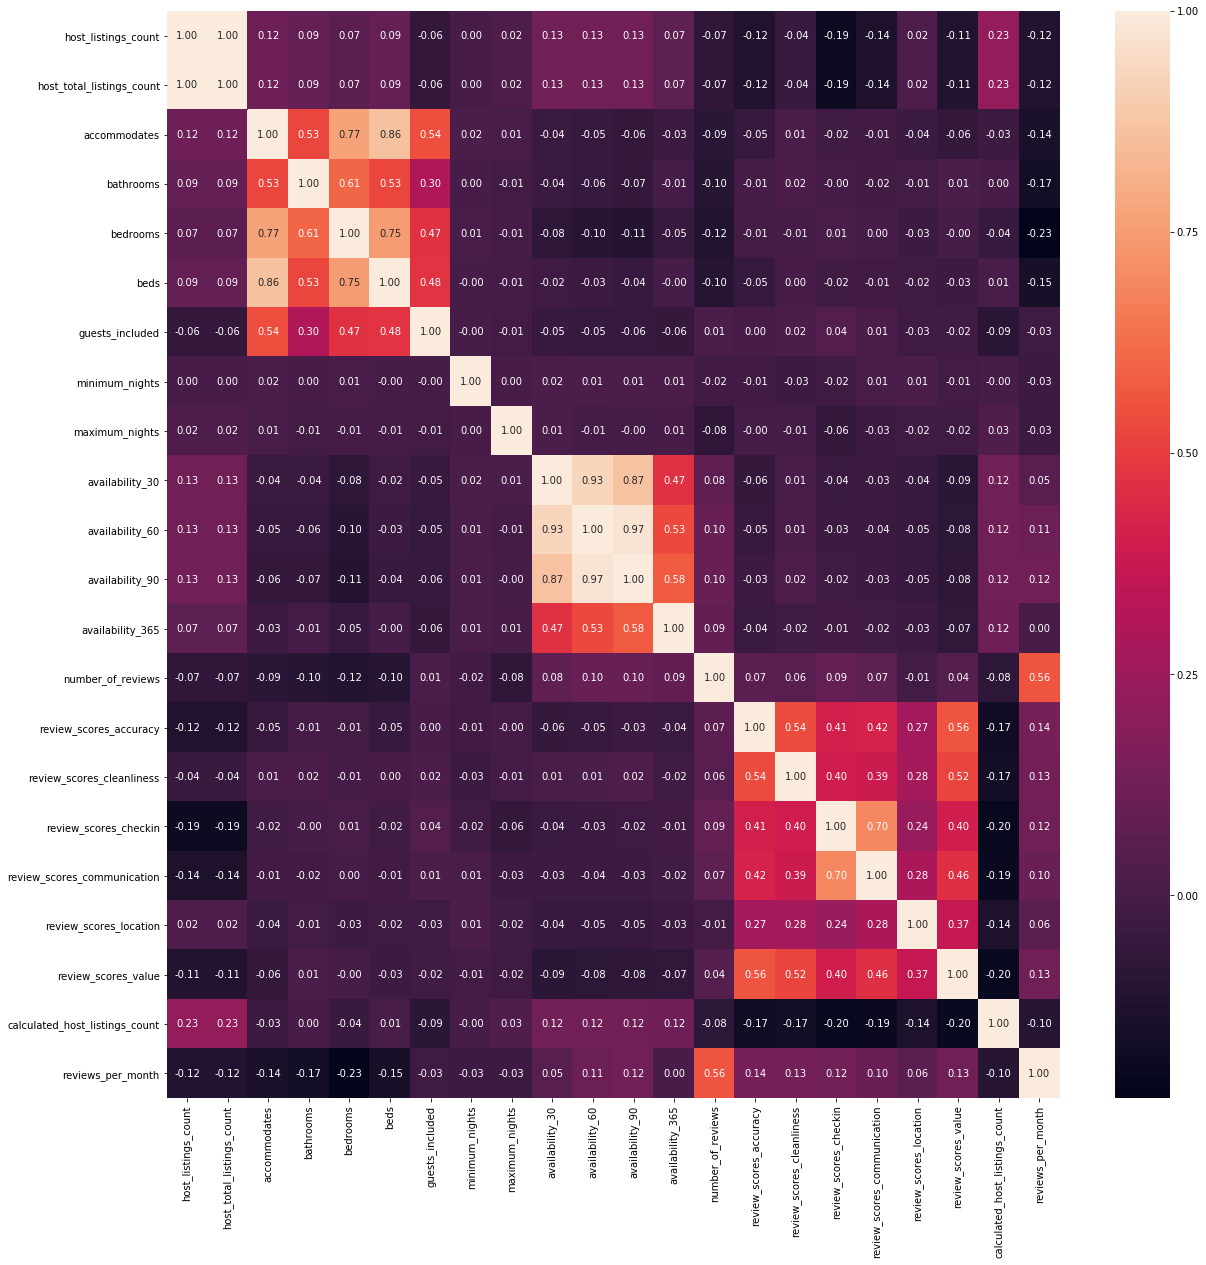

In [173]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), ax=ax, annot=True, fmt=".2f");

In [174]:
# Create binary amenity columns
for index in range(30):
    for a in amenities_unique:
        df_amenities[a] = 0

for index in range(30):
    for a in amenities_unique:
        df_amenities[a] += np.where(df_amenities[index] == a, 1, 0)

# Drop redundant column
df_amenities.drop(columns=[x for x in range(30)],inplace=True)

In [175]:
# Append amenities columns to original dataframe
x=x.join(df_amenities,how='left')

# Drop amenities column
x.drop(columns='amenities',inplace=True)
x.head(5)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Kitchen,Wireless Internet,Hot Tub,Pool,Washer Dryer,Hair Dryer,Iron,Suitable for Events,24Hour Checkin,Doorman,TV,Indoor Fireplace,Breakfast,Free Parking on Premises,Cable TV,Gym,Pets Allowed,Dogs,Lock on Bedroom Door,Washer,Smoke Detector,Elevator in Building,Pets live on this property,Safety Card,Shampoo,FamilyKid Friendly,Dryer,Wheelchair Accessible,Other pets,First Aid Kit,Cats,Hangers,Carbon Monoxide Detector,Essentials,Smoking Allowed,Heating,Internet,BuzzerWireless Intercom,Laptop Friendly Workspace,Fire Extinguisher,Air Conditioning
0,within a few hours,96%,100%,f,3.0,3.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$85.00,0,0,2,$5.00,1,365,14,41,71,346,207,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,within an hour,98%,100%,t,6.0,6.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$150.00,$100.00,$40.00,1,$0.00,2,90,13,13,16,291,43,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,within a few hours,67%,100%,f,2.0,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,$975.00,"$1,000.00",$300.00,10,$25.00,4,30,1,6,17,220,20,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,within an hour,100%,NaN,f,2.0,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,$450.00,$700.00,$125.00,6,$15.00,1,1125,30,60,90,365,38,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,98119,t,House,Private room,2,1.0,1.0,1.0,Real Bed,$120.00,0,$40.00,1,$30.00,1,6,0,0,27,302,17,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Transforming strings and currencies into numerical values

There are several numerical features encoded as strings:

- host_response_rate (percentage)
- host_acceptance_rate (percentage)
- price (currency)
- security_deposit (currency)
- cleaning_fee (currency)
- extra_people

All these variables have to be changed into numerical values (integers or float).


In [176]:
# Replace percentages using aregular expression
cols=['host_response_rate','host_acceptance_rate']
x[cols] = x[cols].replace('%', '', regex=True).astype(float)

# Convert into numeric values
x[cols]=x[cols]/100
x[cols].head(5)

,host_response_rate,host_acceptance_rate
0,0.96,1.0
1,0.98,1.0
2,0.67,1.0
4,1.00,NaN
5,NaN,NaN


In [177]:
# Remove dollar signs
cols=['price', 'security_deposit','cleaning_fee','extra_people']
x[cols]=x[cols].replace('[\$,]', '', regex=True).astype(float)
x[cols].head(5)

,price,security_deposit,cleaning_fee,extra_people
0,85.0,0.0,0.0,5.0
1,150.0,100.0,40.0,0.0
2,975.0,1000.0,300.0,25.0
4,450.0,700.0,125.0,15.0
5,120.0,0.0,40.0,30.0


In [178]:
x.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Kitchen,Wireless Internet,Hot Tub,Pool,Washer Dryer,Hair Dryer,Iron,Suitable for Events,24Hour Checkin,Doorman,TV,Indoor Fireplace,Breakfast,Free Parking on Premises,Cable TV,Gym,Pets Allowed,Dogs,Lock on Bedroom Door,Washer,Smoke Detector,Elevator in Building,Pets live on this property,Safety Card,Shampoo,FamilyKid Friendly,Dryer,Wheelchair Accessible,Other pets,First Aid Kit,Cats,Hangers,Carbon Monoxide Detector,Essentials,Smoking Allowed,Heating,Internet,BuzzerWireless Intercom,Laptop Friendly Workspace,Fire Extinguisher,Air Conditioning
0,within a few hours,0.96,1.0,f,3.0,3.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,within an hour,0.98,1.0,t,6.0,6.0,t,t,Queen Anne,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,within a few hours,0.67,1.0,f,2.0,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,within an hour,1.00,NaN,f,2.0,2.0,t,t,Queen Anne,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,f,1.0,1.0,t,t,Queen Anne,98119,t,House,Private room,2,1.0,1.0,1.0,Real Bed,120.0,0.0,40.0,1,30.0,1,6,0,0,27,302,17,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,1,2.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Encoding of categorical variables

The categorical variables are as follows:
    
- host_response_time
- host_is_superhost (binary)
- host_has_profile_pic (binary)
- host_identity_verified (binary)
- neighbourhood_group_cleansed
- zipcode
- is_location_exact (binary)
- property_type
- room_type
- bed_type
- instant_bookable (binary)
- cancellation_policy
- require_guest_profile_picture (binary)
- require_guest_phone_verification (binary)

In [179]:
# Mapping of binary colums to 0 and 1
binary_cols=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact'
             ,'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
x[binary_cols]=np.where(x[binary_cols]=='t', 1, 0)

categorical_cols=['host_response_time','neighbourhood_group_cleansed','zipcode'
             ,'property_type','room_type','bed_type','cancellation_policy']

x=pd.get_dummies(data=x, columns=categorical_cols,drop_first=True)

In [180]:
x.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Kitchen,Wireless Internet,Hot Tub,Pool,Washer Dryer,Hair Dryer,Iron,Suitable for Events,24Hour Checkin,Doorman,TV,Indoor Fireplace,Breakfast,Free Parking on Premises,Cable TV,Gym,Pets Allowed,Dogs,Lock on Bedroom Door,Washer,Smoke Detector,Elevator in Building,Pets live on this property,Safety Card,Shampoo,FamilyKid Friendly,Dryer,Wheelchair Accessible,Other pets,First Aid Kit,Cats,Hangers,Carbon Monoxide Detector,Essentials,Smoking Allowed,Heating,Internet,BuzzerWireless Intercom,Laptop Friendly Workspace,Fire Extinguisher,Air Conditioning,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99 98122,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
0,0.96,1.0,0,3.0,3.0,1,1,1,4,1.0,1.0,1.0,85.0,0.0,0.0,2,5.0,1,365,14,41,71,346,207,10.0,10.0,10.0,10.0,9.0,10.0,0,0,0,2,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0.98,1.0,1,6.0,6.0,1,1,1,4,1.0,1.0,1.0,150.0,100.0,40.0,1,0.0,2,90,13,13,16,291,43,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,6,1.48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.67,1.0,0,2.0,2.0,1,1,1,11,4.5,5.0,7.0,975.0,1000.0,300.0,10,25.0,4,30,1,6,17,220,20,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,2,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1.00,NaN,0,2.0,2.0,1,1,1,6,2.0,3.0,3.0,450.0,700.0,125.0,6,15.0,1,1125,30,60,90,365,38,9.0,9.0,10.0,10.0,9.0,9.0,

Inspect the dataset for missing values.

In [181]:
(x.isnull().sum(axis=0).sort_values(ascending=False).head(20)/len(x))*100

host_acceptance_rate           15.042573
host_response_rate              9.839167
bathrooms                       0.378430
review_scores_accuracy          0.346894
review_scores_checkin           0.346894
review_scores_value             0.283822
review_scores_location          0.252286
review_scores_cleanliness       0.189215
bedrooms                        0.189215
review_scores_communication     0.126143
Suitable for Events             0.000000
Gym                             0.000000
Cable TV                        0.000000
24Hour Checkin                  0.000000
Dogs                            0.000000
Free Parking on Premises        0.000000
Breakfast                       0.000000
Indoor Fireplace                0.000000
TV                              0.000000
Doorman                         0.000000
dtype: float64

With the exception of host_acceptance_rate and host_response_rate the amount of missing data is now quite low: 

In [182]:
x.host_acceptance_rate.value_counts()

1.0    2693
0.0       1
Name: host_acceptance_rate, dtype: int64

In [183]:
x.host_response_rate.value_counts()

1.00    2080
0.90     148
0.80      93
0.99      62
0.88      51
0.94      41
0.50      35
0.67      31
0.75      29
0.89      29
0.98      28
0.86      27
0.70      22
0.97      21
0.93      17
0.96      17
0.60      17
0.83      16
0.92      15
0.33      11
0.63       9
0.95       7
0.40       7
0.78       6
0.91       5
0.43       4
0.71       4
0.76       3
0.87       3
0.64       3
0.57       2
0.82       2
0.17       2
0.58       2
0.25       2
0.31       1
0.65       1
0.38       1
0.30       1
0.69       1
0.56       1
0.53       1
0.81       1
Name: host_response_rate, dtype: int64

The host acceptance rate does not contain significant information, therefore the column will be dropped.

In [184]:
# Drop host_acceptance_rat
x.drop(columns='host_acceptance_rate',inplace=True)

In [185]:
x.to_csv('x.csv', encoding='utf-8', index=False, sep=";")
Y.to_csv('Y.csv', encoding='utf-8', index=False, sep=";")

All other missing values will be imputed by the median.

#### Splitting of data into test and training data and imputation

In [213]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [214]:
# Imputation of test and training data
imputer=Imputer(strategy='median')
X_train_imp=imputer.fit_transform(X_train)
X_test_imp=imputer.transform(X_test)

#### Scaling and normalization

In [215]:
# Scaling of test and training data
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train_imp)

#transform test data
X_test_scale=scaler.transform(X_test_imp)

In [216]:
def train_and_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learn: the learning algorithm used for training and prediction
       - size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: review_scores_rating training set
       - X_test: features testing set
       - y_test: review_scores_rating testing set
    '''
    results = {}
    
    #Fit the learner to the training data and get training time
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    results['train_time'] = end-start
    
    # Get predictions on the test set(X_test), then get predictions on first 300 training samples
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    
    #Compute accuracy on the first 300 training samples
    results['mse_train'] = mean_squared_error(y_train[:300],predictions_train)
    
    #Compute accuracy on test set
    results['mse_test'] = mean_squared_error(y_test,predictions_test)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print("MSE_train: %.4f" % results['mse_train'])
    print("MSE_test: %.4f" % results['mse_test'])
    print("Training score:%.4f" % learner.score(X_train,y_train))
    print("Test score:%.4f" % learner.score(X_test,y_test))
    return results

In [263]:
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=10,min_samples_split=10,max_leaf_nodes=8,random_state=42)
logistic_regression = LogisticRegression(random_state=0, solver='lbfgs')
svr_lin = SVR(kernel='linear', C=100, gamma='auto')

In [239]:
# Sample size for 1%, 25% and 100% of the training data
samples_100 = len(y_train)
samples_1 = int(0.01*len(y_train))

In [240]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(linear_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LinearRegression trained on 25 samples.
MSE_train: 35.4281
MSE_test: 42.9615
Training score:0.1236
Test score:0.1159
LinearRegression trained on 2536 samples.
MSE_train: 13.9938
MSE_test: 18.1669
Training score:0.6784
Test score:0.6262


In [264]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(decision_tree, samples, X_train_scale, y_train, X_test_scale, y_test)

DecisionTreeRegressor trained on 25 samples.
MSE_train: 53.4398
MSE_test: 64.1074
Training score:-0.2293
Test score:-0.3192
DecisionTreeRegressor trained on 2536 samples.
MSE_train: 19.8673
MSE_test: 23.2426
Training score:0.5838
Test score:0.5217


In [225]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(logistic_regression, samples, X_train_scale, y_train, X_test_scale, y_test)

LogisticRegression trained on 25 samples.
MSE_train: 49.7900
MSE_test: 66.4614
Training score:0.2539
Test score:0.2094
LogisticRegression trained on 2536 samples.
MSE_train: 22.6133
MSE_test: 35.4094
Training score:0.4724
Test score:0.2740


In [228]:
for i, samples in enumerate([samples_1, samples_100]):
        train_and_predict(svr_lin, samples, X_train_scale, y_train, X_test_scale, y_test)

SVR trained on 25 samples.
MSE_train: 35.5876
MSE_test: 42.9766
Training score:0.1234
Test score:0.1156
SVR trained on 2536 samples.
MSE_train: 14.7894
MSE_test: 18.4969
Training score:0.6590
Test score:0.6194


Comparing the results of the models above, the multiple linear regression model performs better than the other models. Not only are the test scores, which is the R2, i.e. ability of the model to explain the variance in the data is higher (0.63 for linear regression vs. 0.52 for decision tree), but the MSE is lower for linear regression model as well (18.2 vs. 23.2 for decision tree).

Hence, I use the linear regression model to interpret the results, which are to get the feature importances. These would consist of the coefficients of the features.

In [242]:
# Extract coefficients
feature_importances = pd.DataFrame(linear_regression.coef_, index = X_train.columns,
                                    columns=['coefficient']).sort_values('coefficient', ascending=False)

In [244]:
feature_importances.head(25)

,coefficient
Suitable for Events,9.864529e+13
Hot Tub,6.706216e+13
Lock on Bedroom Door,5.387668e+13
Washer,4.081960e+13
FamilyKid Friendly,3.595406e+13
Iron,2.895409e+13
Heating,2.712322e+13
First Aid Kit,2.343405e+13
Free Parking on Premises,2.233518e+13
Safety Card,1.797028e+13


In [253]:
decision_tree

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=8, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [271]:
from sklearn import tree
x.columns[7]

'accommodates'

In [265]:
tree.export_graphviz(decision_tree, out_file='tree.dot')       

# Business Question 2: Where are the highest revenue-generating times of the year for Seattle home-owners? 

To answer this question, we can use the price column in the listings dataset, as the price column in the calendar dataset is mostly null.

In [291]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

In [292]:
# check missing values
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [293]:
df_calendar_clean=df_calendar.drop(columns='price')

In [294]:
# Rename id column to merge on
df_calendar_clean.rename(columns={'listing_id': 'id'},inplace=True)

# Convert listings price data into string, get subset of listings data
df_listings['price']=df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
df_listings_price=df_listings[['id','price']]

# Join datasets on join column id.
df_result_price = pd.merge(df_calendar_clean, df_listings_price, how='left', on=['id'])

In [296]:
df_result_price.head(10)

,id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,85.0
3,241032,2016-01-07,f,85.0
4,241032,2016-01-08,f,85.0
5,241032,2016-01-09,f,85.0
6,241032,2016-01-10,f,85.0
7,241032,2016-01-11,f,85.0
8,241032,2016-01-12,f,85.0
9,241032,2016-01-13,t,85.0


In [299]:
result_price_xavailable=df_result_price[df_result_price['available']=='f']

result_price_xavailable=result_price_xavailable.groupby('date')['price'].mean()

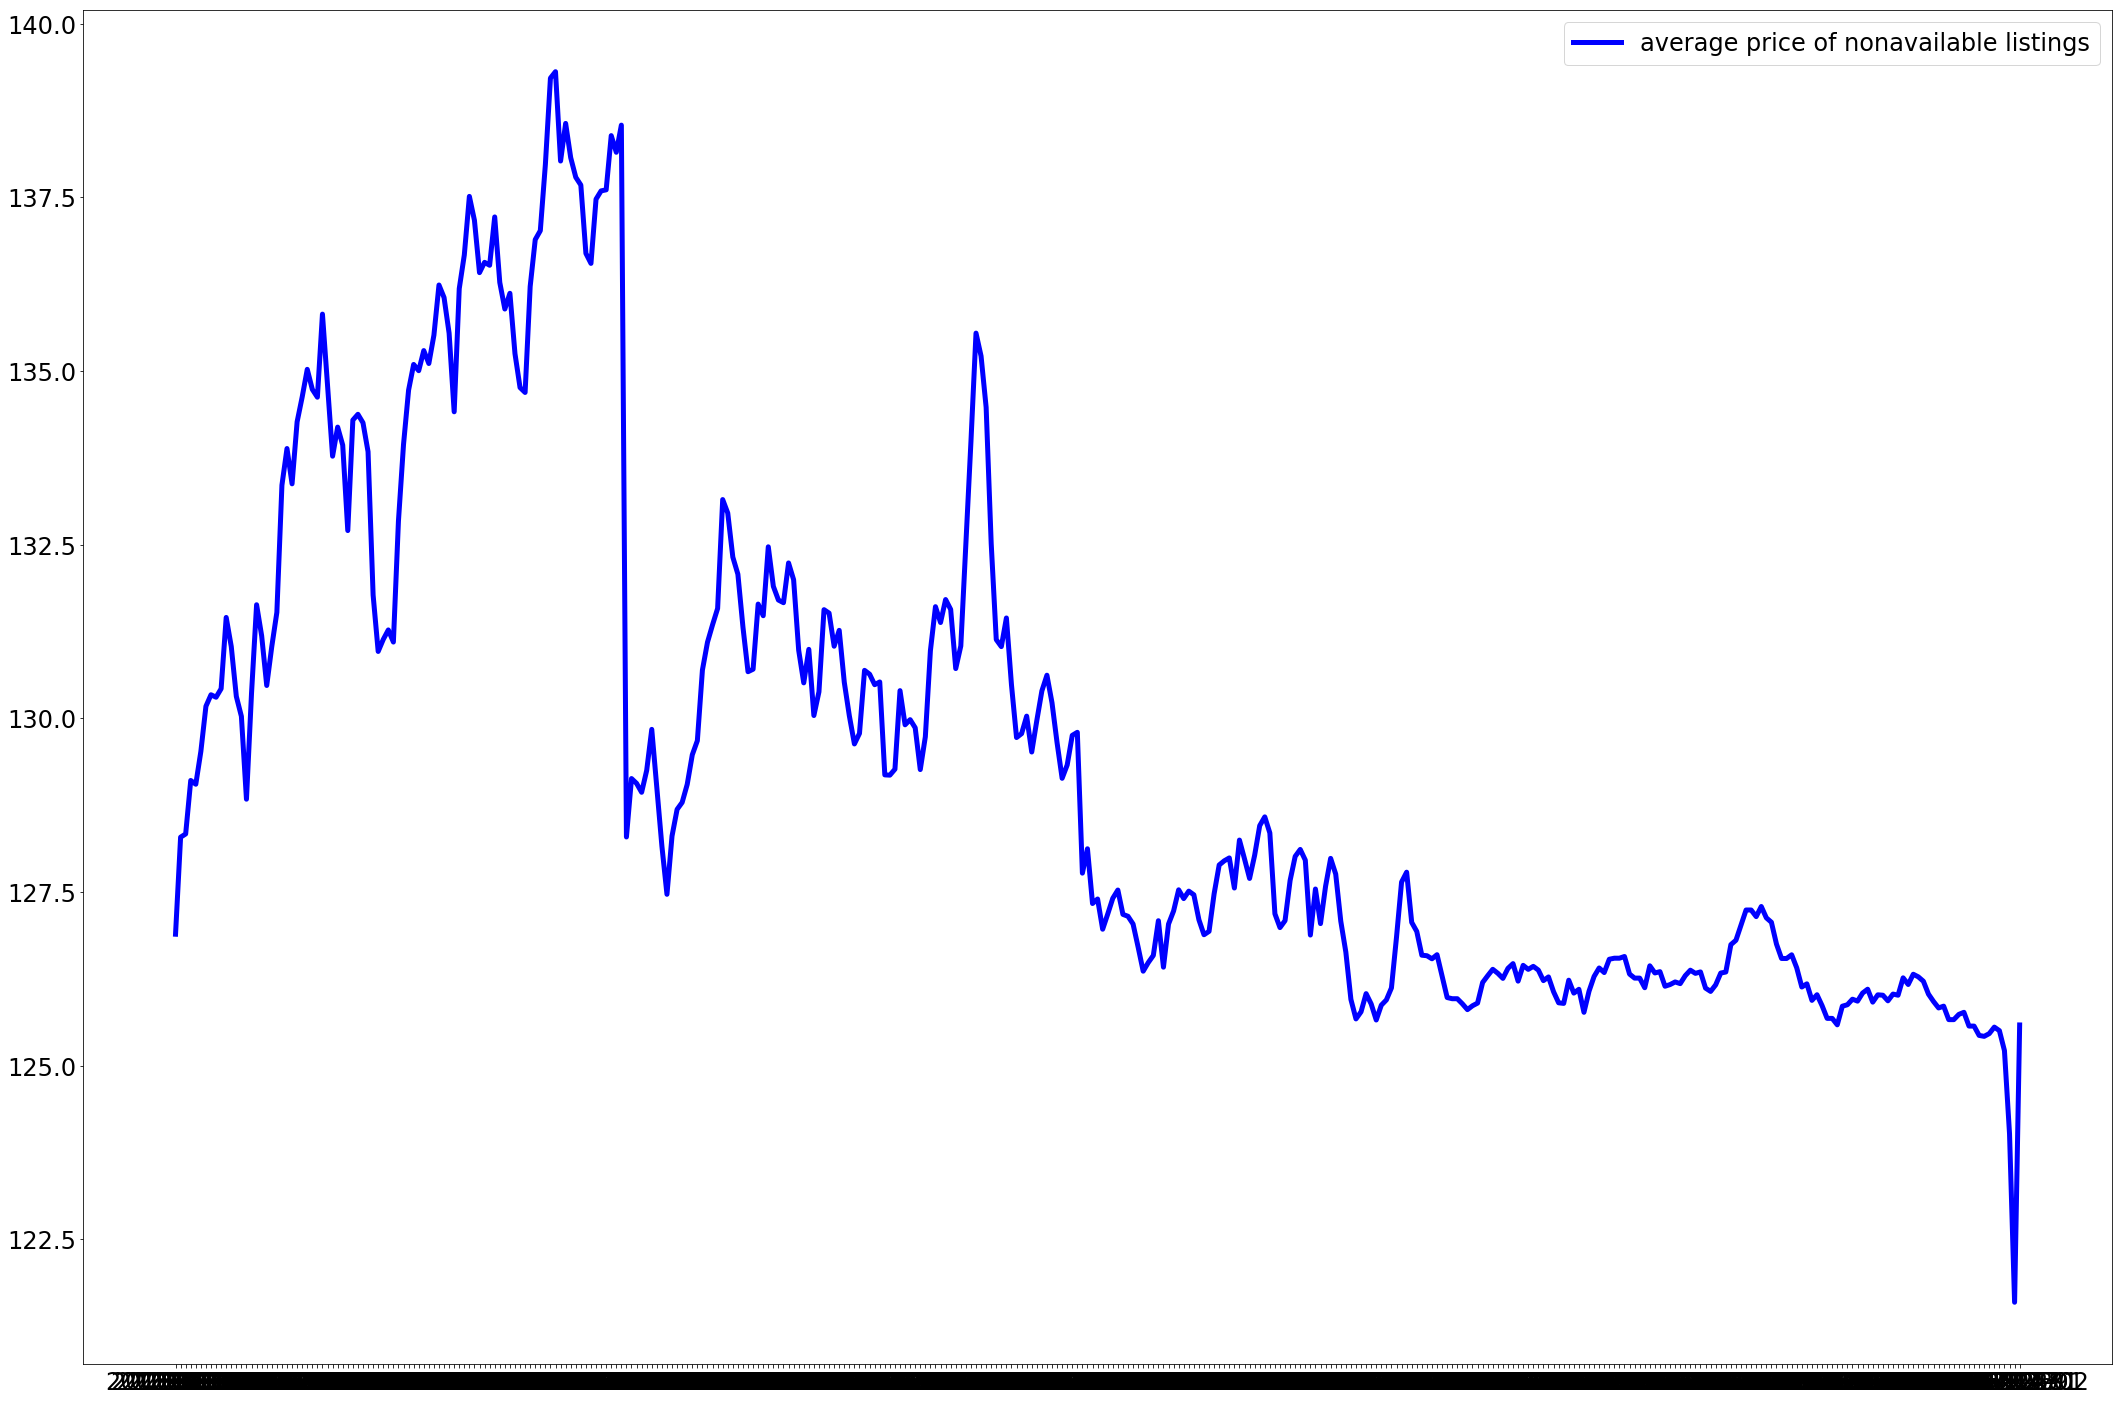

In [300]:
df=pd.DataFrame({'date': result_price_xavailable.index, 'average price of nonavailable listings': result_price_xavailable.values })

#plot trend of prices
plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 24})
plt.plot('date', 'average price of nonavailable listings', data=df, marker='', markerfacecolor='blue', color='blue', linewidth=5)
plt.legend()
plt.tight_layout()

In [301]:
result_price_xavailable.sort_values(ascending=False).head(10)

date
2016-03-19    139.310502
2016-03-18    139.217593
2016-03-21    138.565766
2016-04-01    138.540856
2016-03-30    138.389720
2016-03-31    138.149577
2016-03-22    138.072581
2016-03-20    138.023723
2016-03-17    137.972553
2016-03-23    137.790468
Name: price, dtype: float64

# Business Question 3: Where are the highest revenue-generating areas for Seattle homeowners ?

In [303]:
df_listings = pd.read_csv("data/listings.csv")
df_calendar = pd.read_csv("data/calendar.csv")
df_reviews = pd.read_csv("data/reviews.csv")

In [305]:
# Get subset of listings data
df_listings_location=df_listings[['id','neighbourhood_cleansed','price']]

In [308]:
# Sort neighbourhood by average price of house
df_listings_location.head()

,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,$85.00
1,953595,West Queen Anne,$150.00
2,3308979,West Queen Anne,$975.00
3,7421966,West Queen Anne,$100.00
4,278830,West Queen Anne,$450.00


In [313]:
cols=['price']
df_listings_location[cols]=df_listings_location[cols].replace('[\$,]', '', regex=True).astype(float)
df_listings_location.head(5)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,85.0
1,953595,West Queen Anne,150.0
2,3308979,West Queen Anne,975.0
3,7421966,West Queen Anne,100.0
4,278830,West Queen Anne,450.0


In [314]:
# Sort neighbourhood by average price of house
df_listings_location.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

neighbourhood_cleansed
Southeast Magnolia     231.705882
Portage Bay            227.857143
Westlake               194.470588
West Queen Anne        187.769231
Montlake               182.789474
Briarcliff             176.571429
Sunset Hill            176.055556
Industrial District    173.333333
Alki                   171.619048
Windermere             169.900000
Name: price, dtype: float64

In [320]:
# merge dataset with relevant columns together
df_listings_price = df_listings_location[['id','price','neighbourhood_cleansed']]

# merge datasets
result_price_2 = pd.merge(df_calendar_clean, df_listings_price, how='left', on=['id'])

# calculate revenue based on availability - if unavailable, count revenues
result_price_2['revenue']=np.where(result_price_2['available']=='f', result_price_2['price']*1, 0)

# get year column from date
result_price_2['year']= result_price_2.date.str[:4]

In [328]:
result_price_2.sample(n=10, random_state=1)

,id,date,available,price,neighbourhood_cleansed,revenue,year
1054364,1511620,2016-09-04,t,49.0,Broadway,0.0,2016
46994,7604621,2016-10-04,f,85.0,Adams,85.0,2016
976383,1716901,2016-01-12,f,85.0,Broadway,85.0,2016
336281,9484823,2016-04-29,t,90.0,Minor,0.0,2016
798515,7388899,2016-09-20,t,55.0,Dunlap,0.0,2016
358312,3691288,2016-09-07,t,163.0,Leschi,0.0,2016
449517,6992696,2016-07-24,t,199.0,Belltown,0.0,2016
572090,356608,2016-05-18,t,196.0,First Hill,0.0,2016
549676,2749725,2016-12-20,t,175.0,Central Business District,0.0,2016
1017163,7618526,2016-10-03,t,85.0,Broadway,0.0,2016


In [323]:
result_price_2.groupby(['year','neighbourhood_cleansed'])['revenue'].sum().sort_values(ascending=False).head(15)

year  neighbourhood_cleansed   
2016  Broadway                     6490405.0
      Belltown                     5264230.0
      Wallingford                  2777564.0
      Fremont                      2367379.0
      Stevens                      2169021.0
      First Hill                   2083813.0
      Minor                        1943734.0
      Lower Queen Anne             1910089.0
      East Queen Anne              1728156.0
      Central Business District    1640979.0
      West Queen Anne              1354347.0
      Phinney Ridge                1289182.0
      Greenwood                    1249409.0
      Adams                        1124162.0
      West Woodland                1078086.0
Name: revenue, dtype: float64